# Visualising clusters with silhouette coefficients

In this Notebook you will see how different clusterings can be visualised with silhouette plots.

You should spend approximately an hour and ten minutes on this Notebook, and around 20 minutes on the iCMA question referenced at the end of the Notebook.

In [1]:
# Standard imports

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In the module materials we have discussed how silhouette coefficients can be used to visualise clusterings. In this Notebook we will look at how to use the library functions to find a dataset's silhouette coefficients, and how the properties of that dataset affect the silhouette plot.

To get an idea of how the silhouette coefficients might work in practice, let's have a look at how they might apply to some made-up data. First of all, note that the definition of the silhouette coefficient from Section 2.5 can be rewritten as:

$$ s(i)=\frac{b(i)-a(i)}{\text{MAX}\big(a(i), b(i)\big)} $$

where $a(i)$ is the average distance from the point $i$ to the points in the same cluster, and $b(i)$ is the average distance from the point $i$ to the points in the other clusters.

The `sklearn` library contains a built-in silhouette function, so we shall use that:

In [2]:
from sklearn.metrics import silhouette_samples

Now, to try out the `silhouette_samples` function, we'll need some data. 

Some (made-up) illustrative data is in the file `data/silhouetteExampleData1.csv`. This file contains a set of points in 2-dimensional space, where each point has been placed into a cluster `A`, `B` or `C`.


In [3]:
silhouetteExampleData1_df = pd.read_csv('data/silhouetteExampleData1.csv')

silhouetteExampleData1_df.head()

,X,Y,cluster
0,47.960664,62.148807,C
1,21.665208,36.356117,A
2,47.286718,66.189507,C
3,78.749442,30.592090,B
4,47.164989,66.744426,C


To see what this data looks like, we can just plot it as a scatter diagram. To make it easier to see how the different clusters are coloured, we can define a colour map at the beginning of the cell, so that each cluster is associated with a particular colour:

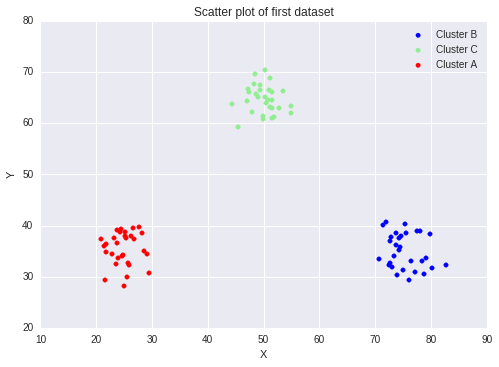

In [4]:
colourMap_dict = {'A':'red',
                  'B':'blue',
                  'C':'lightGreen'}

# We can then loop through the different clusters:
for cluster in set(silhouetteExampleData1_df['cluster']):
    
    plt.scatter(silhouetteExampleData1_df['X'][silhouetteExampleData1_df['cluster']==cluster],
                silhouetteExampleData1_df['Y'][silhouetteExampleData1_df['cluster']==cluster],
                color=colourMap_dict[cluster], label='Cluster ' + cluster
               )

plt.legend()

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Scatter plot of first dataset')

For this dataset, you can see that the data forms three very distinct, highly separated clusters.

We can use the in-built function `silhouette_samples` to find the silhouette coefficient for each of the data points. The function is called with:

    silhouette_samples(dataframe, clusters_array)
    
where `dataframe` is a DataFrame containing the data, and `clusters_array` is an `np.array` of the clusters to which each data point is assigned:

In [5]:
# Add the silhouette coefficients as a new column in the
# silhouetteExampleData1_df DataFrame:
silhouetteExampleData1_df['silhouette'] = silhouette_samples(silhouetteExampleData1_df[['X', 'Y']],
                                                             np.array(silhouetteExampleData1_df['cluster']))

silhouetteExampleData1_df.head()

,X,Y,cluster,silhouette
0,47.960664,62.148807,C,0.868199
1,21.665208,36.356117,A,0.882912
2,47.286718,66.189507,C,0.883629
3,78.749442,30.592090,B,0.849478
4,47.164989,66.744426,C,0.878176


**Note:** The second argument of `silhouette_samples` *must* be an `np.array`, not a Python `list`, a `pandas.Series` or a `pandas.Dataframe`. This is unusual: in most cases with *pandas*, it is possible to use a *pandas* Series instead of an array, but in this case the clusters must be provided as an array.

We can now plot the silhouette data as a bar chart. We will use the same colour map as for the scatter plot, to be able to see which cluster matches which silhouette.

(0, 1.2)

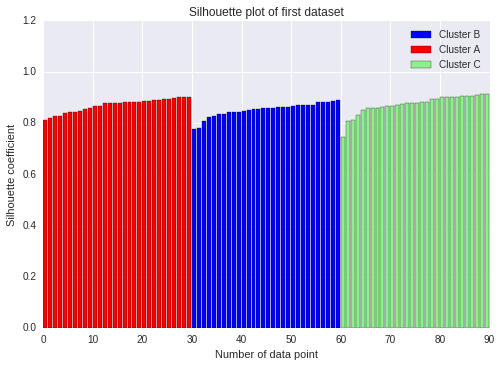

In [6]:
# Sort the DataFrame so we see the curve as in the module materials
silhouettePlotData1_df = silhouetteExampleData1_df.sort_values(['cluster', 'silhouette'])
silhouettePlotData1_df.index = list(range(len(silhouetteExampleData1_df)))

for cluster in set(silhouettePlotData1_df['cluster']):
    plt.bar(silhouettePlotData1_df[silhouettePlotData1_df['cluster']==cluster].index,
            silhouettePlotData1_df[silhouettePlotData1_df['cluster']==cluster]['silhouette'], 
            color=colourMap_dict[cluster], label='Cluster ' + cluster)

plt.title('Silhouette plot of first dataset')

plt.legend()

plt.xlabel('Number of data point')
plt.ylabel('Silhouette coefficient')

plt.ylim((0, 1.2))

In this case the three blocks are of equal sizes, showing that there are the same number of points in each cluster. The values are generally high (between 0.8 and 1), suggesting that the clustering is quite tight.

What if there's a greater spread among the points? Let's look at a second dataset, in which there is a greater spread among the data points. The second data set is in the file `data/silhouetteExampleData2.csv`.

Let's import the data and plot it as a scatter diagram:

In [7]:
silhouetteExampleData2_df = pd.read_csv('data/silhouetteExampleData2.csv')

silhouetteExampleData2_df.head()

,X,Y,cluster
0,46.744289,61.198648,C
1,42.367320,60.973159,C
2,57.687492,65.373111,C
3,85.631036,34.063463,B
4,32.847252,31.071468,A


As last time, we can plot the points on a two-dimensional graph:

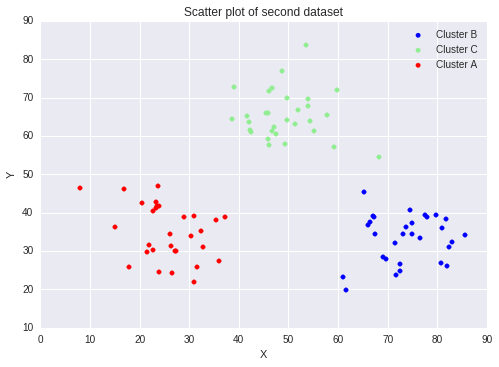

In [8]:
# And plot a scatterplot of each differently classified
# set of points.
colourMap_dict = {'A':'red',
                  'B':'blue',
                'C':'lightGreen'}

# We can then loop through the different clusters:
for cluster in set(silhouetteExampleData2_df['cluster']):
    
    plt.scatter(silhouetteExampleData2_df['X'][silhouetteExampleData2_df['cluster']==cluster],
                silhouetteExampleData2_df['Y'][silhouetteExampleData2_df['cluster']==cluster],
                color=colourMap_dict[cluster], label='Cluster ' + cluster
               )

plt.legend()

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Scatter plot of second dataset')   

In this case, the points are more spread out than they were in the previous plot. How does that affect the silhouette plot?

In [9]:
silhouetteExampleData2_df['silhouette'] = silhouette_samples(silhouetteExampleData2_df[['X', 'Y']],
                                                             np.array(silhouetteExampleData2_df['cluster']))

silhouetteExampleData2_df.head()

,X,Y,cluster,silhouette
0,46.744289,61.198648,C,0.746658
1,42.367320,60.973159,C,0.667646
2,57.687492,65.373111,C,0.679763
3,85.631036,34.063463,B,0.712575
4,32.847252,31.071468,A,0.704021


(0, 1.1)

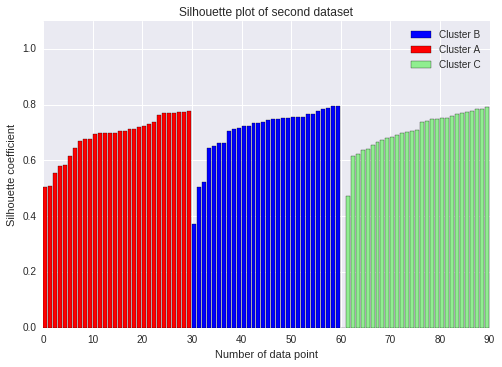

In [10]:
# Sort the DataFrame so we see the curve as in the module materials
silhouettePlotData2_df = silhouetteExampleData2_df.sort_values(['cluster', 'silhouette'])
silhouettePlotData2_df.index = list(range(len(silhouetteExampleData2_df)))

for cluster in set(silhouettePlotData2_df['cluster']):
    plt.bar(silhouettePlotData2_df[silhouettePlotData2_df['cluster']==cluster].index,
            silhouettePlotData2_df[silhouettePlotData2_df['cluster']==cluster]['silhouette'], 
            color=colourMap_dict[cluster], label='Cluster ' + cluster)

plt.title('Silhouette plot of second dataset')

plt.xlabel('Number of data point')
plt.ylabel('Silhouette coefficient')

plt.legend()

plt.ylim((0, 1.1))

The three sets of bars are equally sized, as in the first case. This shows again that the three clusters each contain the same number of points. However, in this case the coefficients are much lower, ranging from about 0.3 to about 0.8. This shows that in this case the ratio of the cluster cohesion (how close together the points in the cluster are) to the cluster separation (how far apart the clusters are) is much smaller than for the first dataset.

An even more extreme case is where there is overlap between the different clusters. This is illustrated in the data contained in the file `data/silhouetteExampleData3.csv`.

In [11]:
silhouetteExampleData3_df = pd.read_csv('data/silhouetteExampleData3.csv')

silhouetteExampleData3_df.head()

,X,Y,cluster
0,20.776569,25.272324,A
1,37.522266,31.841936,A
2,52.965239,28.286296,A
3,52.151456,60.306102,C
4,35.564021,33.697903,A


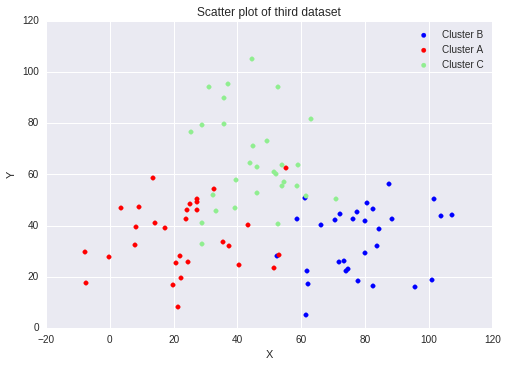

In [12]:
# And plot a scatterplot of each differently classified
# set of points.
colourMap_dict = {'A':'red',
                  'B':'blue',
                  'C':'lightGreen'}

# We can then loop through the different clusters:
for cluster in set(silhouetteExampleData3_df['cluster']):
    
    plt.scatter(silhouetteExampleData3_df['X'][silhouetteExampleData3_df['cluster']==cluster],
                silhouetteExampleData3_df['Y'][silhouetteExampleData3_df['cluster']==cluster],
                color=colourMap_dict[cluster], label='Cluster ' + cluster
               )

plt.legend()

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Scatter plot of third dataset')

As before, we can plot the silhouette coefficients:

In [13]:
silhouetteExampleData3_df['silhouette'] = silhouette_samples(silhouetteExampleData3_df[['X', 'Y']],
                                                             np.array(silhouetteExampleData3_df['cluster']))

silhouetteExampleData3_df.head()

,X,Y,cluster,silhouette
0,20.776569,25.272324,A,0.552809
1,37.522266,31.841936,A,0.353429
2,52.965239,28.286296,A,-0.164909
3,52.151456,60.306102,C,0.498732
4,35.564021,33.697903,A,0.367012


(-1, 1)

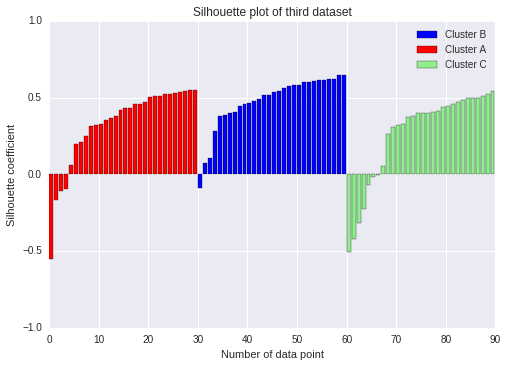

In [14]:
# Sort the DataFrame so we see the curve as in the module materials
silhouettePlotData3_df = silhouetteExampleData3_df.sort_values(['cluster', 'silhouette'])
silhouettePlotData3_df.index = list(range(len(silhouetteExampleData3_df)))

for cluster in set(silhouettePlotData3_df['cluster']):
    plt.bar(silhouettePlotData3_df[silhouettePlotData3_df['cluster']==cluster].index,
            silhouettePlotData3_df[silhouettePlotData3_df['cluster']==cluster]['silhouette'], 
            color=colourMap_dict[cluster], label='Cluster ' + cluster)

plt.title('Silhouette plot of third dataset')

plt.xlabel('Number of data point')
plt.ylabel('Silhouette coefficient')

plt.legend()

plt.ylim((-1, 1))

In this case you can see that for each cluster there are several values which drop below zero. These cases are where the distance from the point to the centroid of its own cluster is greater than the distance to the nearest neighbouring cluster. This is the overlap seen on the scatterplot, and when negative values can be seen on a silhouette plot this indicates the overlap between the different clusters.

## Silhouette plots on clustering the wholesale dataset

Now, let's have a look at some real data. Let's go back to the wholesale dataset and see what the silhouette plots look like, if we try applying *k*-means clustering to that dataset.

In [15]:
wholesaleData_df = pd.read_csv('data/Wholesale customers data full.csv')
wholesaleData_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


We can try clustering on the 6 numerical features. First, try *k*-means with *k*=3.

In [16]:
# Run k-means algorithm on the data

# Select only the features that we actually want to cluster on:
wholesaleNumericData_df = wholesaleData_df[['Fresh',
                                            'Milk',
                                            'Grocery',
                                            'Frozen',
                                            'Detergents_Paper',
                                            'Delicatessen']]

# Then, create an instance of the clusterer
kmeans3 = KMeans(n_clusters=3)
assignedClusters = kmeans3.fit(wholesaleNumericData_df)

We can now use the clusters from `assignedClusters` to calculate the silhouette coefficients. We can store the assigned cluster and the silhouette coefficient for each point in a DataFrame:

In [17]:
silhouetteData_df = pd.DataFrame({'silhouette':silhouette_samples(wholesaleNumericData_df,
                                                                  assignedClusters.labels_),
                                  'cluster':assignedClusters.labels_})

silhouetteData_df.head()

,cluster,silhouette
0,2,0.567912
1,2,0.550662
2,2,0.548582
3,2,0.587283
4,0,-0.101376


And as before, we can plot the data as a bar chart:

(-0.2, 1.1)

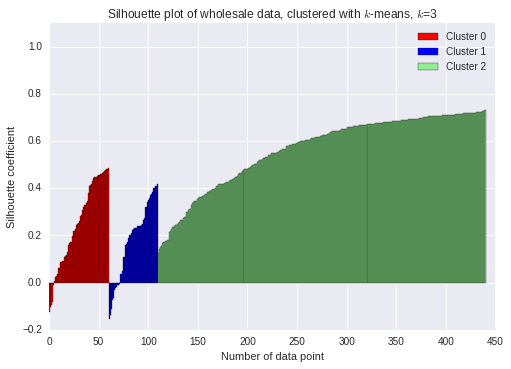

In [18]:
silhouetteData_df.sort_values(['cluster', 'silhouette'], inplace=True)
silhouetteData_df.index = range(len(silhouetteData_df))

colourMap = {0:'red',
             1:'blue',
             2:'lightGreen'}

for cluster in set(silhouetteData_df['cluster']):
    plt.bar(silhouetteData_df[silhouetteData_df['cluster']==cluster].index,
            silhouetteData_df[silhouetteData_df['cluster']==cluster]['silhouette'],
            color=colourMap[cluster],
            label='Cluster {}'.format(cluster), width=1)

plt.title('Silhouette plot of wholesale data, clustered with $k$-means, $k$=3')

plt.xlabel('Number of data point')
plt.ylabel('Silhouette coefficient')

plt.legend()

plt.ylim((-0.2, 1.1))

In this case, the dataset is dominated by one main cluster, with the remaining two clusters appearing to be very spread out (because of the low values of their silhouette coefficients).

As a final investigation, we could try a clustering with *k*=5 rather than *k*=3, to see whether there is a more natural fit with a larger number of clusters:

In [19]:
# Run the same experiments, but using k=5

# Select only the features that we actually want to cluster on:
wholesaleNumericData_df = wholesaleData_df[['Fresh',
                                            'Milk',
                                            'Grocery',
                                            'Frozen',
                                            'Detergents_Paper',
                                            'Delicatessen']]

# Then, create an instance of the clusterer
kmeans5 = KMeans(n_clusters=5)
assignedClusters = kmeans5.fit(wholesaleNumericData_df)

In [20]:
silhouetteData_df = pd.DataFrame({'silhouette':silhouette_samples(wholesaleNumericData_df,
                                                                  assignedClusters.labels_),
                                  'cluster':assignedClusters.labels_})

silhouetteData_df.head()

,cluster,silhouette
0,2,0.225122
1,2,0.205127
2,2,0.279324
3,2,0.221892
4,4,0.441350


(-0.3, 1.1)

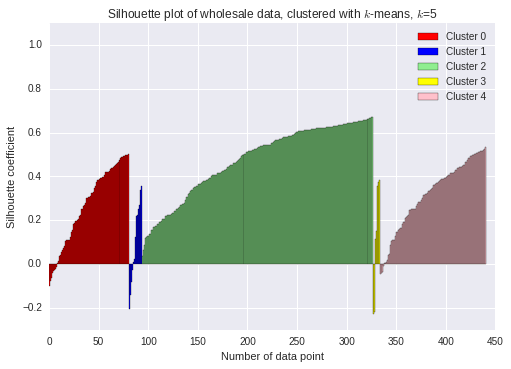

In [21]:
silhouetteData_df.sort_values(['cluster', 'silhouette'], inplace=True)
silhouetteData_df.index = range(len(silhouetteData_df))

colourMap = {0:'red',
             1:'blue',
             2:'lightGreen',
             3:'yellow',
             4:'pink'}

for cluster in set(silhouetteData_df['cluster']):
    plt.bar(silhouetteData_df[silhouetteData_df['cluster']==cluster].index,
            silhouetteData_df[silhouetteData_df['cluster']==cluster]['silhouette'],
            color=colourMap[cluster],
            label='Cluster {}'.format(cluster),
            width=1)

plt.title('Silhouette plot of wholesale data, clustered with $k$-means, $k$=5')

plt.xlabel('Number of data point')
plt.ylabel('Silhouette coefficient')

plt.legend()

plt.ylim((-0.3, 1.1))

It does not appear that increasing the number of clusters has led to a more balanced clustering. In this case two of the groups are very small, suggesting that they could be outliers. However, these outliers might be cases that are worth investigating as part of exploring the dataset.

## What next?

You have now completed this Notebook. You should now be able to answer Question 4 of iCMA 46, which is about interpreting silhouette diagrams. You should spend around 20 minutes on this iCMA question.

If you are working through this Notebook as part of an inline exercise, return to the module materials now.

If you are working through this set of Notebooks as a whole, you've completed the Part 21 Notebooks.